In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as web
import statsmodels.api as sm
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.tsa.stattools import adfuller
import yfinance as yf

[*********************100%***********************]  2 of 2 completed


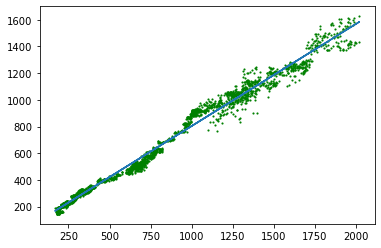

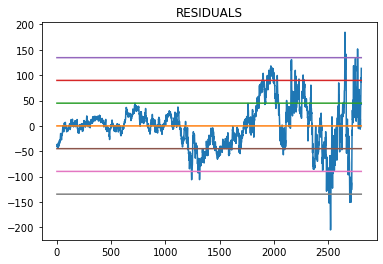

intercept: 38.91995429342319 slope: [0.76519934] R square: 0.9864761962815843
err_ratio: 25.22818283175214
p-value:0.001921
Rescent value of Residuals: 0    113.427462
Name: 2804, dtype: float64


In [10]:
stocks =yf.download(["KOTAKBANK.NS","HDFCBANK.NS"], start = '2010-01-01', end = '2021-05-24')

icici = stocks['Adj Close']["KOTAKBANK.NS"]
hdfc = stocks['Adj Close']["HDFCBANK.NS"]

x = np.array([icici]).reshape((-1,1))
y = np.array(hdfc)

model = LinearRegression().fit(x,y)
lr= LinearRegression()


y_pred = model.predict(x)
res = y-y_pred


std_error1 = res.std()
x2 = sm.add_constant(x)
ols = sm.OLS(y,x2)
ols_result = ols.fit()
std_err = ols_result.bse
std_err_r = std_err[0]

lr.fit(x,y)
y_pred1 = lr.predict(x)
plt.plot(x,y_pred1)
plt.scatter(x,y,s=5,c='g',marker='.')
plt.show()


mean = res.mean()
std1 = mean + res.std()
std2 = mean + 2*res.std()
std3 = mean + 3*res.std()
std_1 = mean - res.std()
std_2 = mean - 2*res.std()
std_3 = mean - 3*res.std()
df = pd.DataFrame({'residuals':res,'mean':mean,'std':std1,'std2':std2,'std3':std3,'std_1':std_1,'std_2':std_2,'std_3':std_3})
plt.plot(df)
plt.title('RESIDUALS')
plt.show()



r_sq = model.score(x,y)
intercept = model.intercept_
slope = model.coef_
print('intercept:',intercept,'slope:',slope,'R square:',r_sq)

err_ratio = intercept/std_err_r
print('err_ratio:',err_ratio)


p_value = adfuller(res)
print('p-value:%f'%p_value[1])

df= pd.DataFrame([res])
print('Rescent value of Residuals:',df.iloc[:,-1])

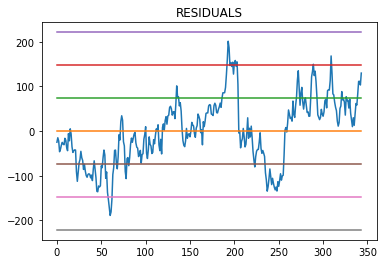

intercept: 22.638148570346175 slope: [0.76517047] R square: 0.8822166119157211
err_ratio: 0.9406471215401117
p-value:0.050576
Resent value of Residuals is: 0    129.760012
Name: 343, dtype: float64


In [15]:
stocks = web.get_data_yahoo(['KOTAKBANK.NS','HDFCBANK.NS'], start = '2020-01-01', end = '2021-05-24')

icici = stocks['Adj Close']['KOTAKBANK.NS']
hdfc = stocks['Adj Close']['HDFCBANK.NS']

x = np.array([icici]).reshape((-1,1))
y = np.array(hdfc)

model = LinearRegression().fit(x,y)

y_pred = model.predict(x)
res = y-y_pred

std_error1 = res.std()
x2 = sm.add_constant(x)
ols = sm.OLS(y,x2)
ols_result = ols.fit()
std_err = ols_result.bse
std_err_r = std_err[0]

mean = res.mean()
std1 = mean + res.std()
std2 = mean + 2*res.std()
std3 = mean + 3*res.std()
std_1 = mean - res.std()
std_2 = mean - 2*res.std()
std_3 = mean - 3*res.std()
df = pd.DataFrame({'residuals':res,'mean':mean,'std':std1,'std2':std2,'std3':std3,'std_1':std_1,'std_2':std_2,'std_3':std_3})
plt.plot(df)
plt.title('RESIDUALS')
plt.show()

r_sq = model.score(x,y)
intercept = model.intercept_
slope = model.coef_
print('intercept:',intercept,'slope:',slope,'R square:',r_sq)


err_ratio = intercept/std_err_r
print('err_ratio:',err_ratio)


p_value = adfuller(res)
print('p-value:%f'%p_value[1])

df =pd.DataFrame(res)
print('Resent value of Residuals is:',df.iloc[-1])